In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# PREDICTING FUNCTION

In [204]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df4 = pd.read_csv('data/hm_docking_data/dude_actives_nolm_hmdock_interaction_energies.txt', sep=',')
#drop index
df4.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
active_hmdock_structure_df = df4.copy()

# add entry_type field
active_hmdock_structure_df['entry_type'] = 'HM docked active'

# simplification: anything activating the receptor is just 'Active'
active_hmdock_structure_df['Function'] = 'Active'

active_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

In [205]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df5 = pd.read_csv('data/hm_docking_data/dude_inactives_nolm_hmdock_interaction_energies.txt', sep=',')

#drop index
df5.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
inactive_hmdock_structure_df = df5.copy()

# add entry_type field
inactive_hmdock_structure_df['entry_type'] = 'HM docked inactive'

inactive_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

In [206]:
print('HM docked actives:', len(active_hmdock_structure_df))
print('HM docked inactives:', len(inactive_hmdock_structure_df))
print('total structures:', len(active_hmdock_structure_df) + len(inactive_hmdock_structure_df))

HM docked actives: 240
HM docked inactives: 285
total structures: 525


In [207]:
# join all datasets
frames = [active_hmdock_structure_df, inactive_hmdock_structure_df] 
structure_df = pd.concat(frames)

# reset index of structure_df
structure_df.reset_index(inplace = True, drop = True)

In [208]:
structure_df.to_csv('structure_df_initial.csv')

In [209]:
# drop entries with bad ligand placement
PDBs_toremove = [
    '4LDL',
    '4LDO',
    '7VDL',
    '7VDM',
    '7VUY',
    '7VUZ',
    '7VV0',
    '7VV3',
    '7VV4',
    '7VV5',
    '7NA7',
    '7FIG',
    '7FIH',
    '7P02',
    '7P00',
    '4U15',
    '2YCX',
    '6YVR',
    '5T04',
    '4XEE',
    '4XES',
    '4GRV'
]

to_drop = []

for i in range(len(structure_df)):
    if structure_df.iloc[i,:]['PDBID'] in PDBs_toremove:
        to_drop.append(i)

structure_df.drop(to_drop, inplace = True)

In [210]:
len(PDBs_toremove)

22

### Default Method of Dropping Residues

In [12]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    print('percentage of structures with interactions at position', resnum, ':', (structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum()/len(structure_df[intenergysum_col])) * 100)
    if structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum() < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

structures with interactions at position 1.21 : 0
percentage of structures with interactions at position 1.21 : 0.0
dropped columns for residue:  1.21 

structures with interactions at position 1.22 : 0
percentage of structures with interactions at position 1.22 : 0.0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
percentage of structures with interactions at position 1.23 : 0.0
dropped columns for residue:  1.23 

structures with interactions at position 1.24 : 0
percentage of structures with interactions at position 1.24 : 0.0
dropped columns for residue:  1.24 

structures with interactions at position 1.25 : 2
percentage of structures with interactions at position 1.25 : 0.38095238095238093
dropped columns for residue:  1.25 

structures with interactions at position 1.26 : 0
percentage of structures with interactions at position 1.26 : 0.0
dropped columns for residue:  1.26 

structures with interactions at position 1.27 : 0
percentage of st

structures with interactions at position 2.49 : 0
percentage of structures with interactions at position 2.49 : 0.0
dropped columns for residue:  2.49 

structures with interactions at position 2.50 : 0
percentage of structures with interactions at position 2.50 : 0.0
dropped columns for residue:  2.50 

structures with interactions at position 2.51 : 0
percentage of structures with interactions at position 2.51 : 0.0
dropped columns for residue:  2.51 

structures with interactions at position 2.52 : 0
percentage of structures with interactions at position 2.52 : 0.0
dropped columns for residue:  2.52 

structures with interactions at position 2.53 : 2
percentage of structures with interactions at position 2.53 : 0.38095238095238093
dropped columns for residue:  2.53 

structures with interactions at position 2.54 : 0
percentage of structures with interactions at position 2.54 : 0.0
dropped columns for residue:  2.54 

structures with interactions at position 2.55 : 0
percentage of st

structures with interactions at position 3.70 : 0
percentage of structures with interactions at position 3.70 : 0.0
dropped columns for residue:  3.70 

structures with interactions at position 3.71 : 0
percentage of structures with interactions at position 3.71 : 0.0
dropped columns for residue:  3.71 

structures with interactions at position 4.29 : 0
percentage of structures with interactions at position 4.29 : 0.0
dropped columns for residue:  4.29 

structures with interactions at position 4.30 : 0
percentage of structures with interactions at position 4.30 : 0.0
dropped columns for residue:  4.30 

structures with interactions at position 4.31 : 0
percentage of structures with interactions at position 4.31 : 0.0
dropped columns for residue:  4.31 

structures with interactions at position 4.32 : 0
percentage of structures with interactions at position 4.32 : 0.0
dropped columns for residue:  4.32 

structures with interactions at position 4.33 : 0
percentage of structures with in

percentage of structures with interactions at position 5.69 : 0.0
dropped columns for residue:  5.69 

structures with interactions at position 5.70 : 0
percentage of structures with interactions at position 5.70 : 0.0
dropped columns for residue:  5.70 

structures with interactions at position 5.71 : 0
percentage of structures with interactions at position 5.71 : 0.0
dropped columns for residue:  5.71 

structures with interactions at position 5.72 : 0
percentage of structures with interactions at position 5.72 : 0.0
dropped columns for residue:  5.72 

structures with interactions at position 5.73 : 0
percentage of structures with interactions at position 5.73 : 0.0
dropped columns for residue:  5.73 

structures with interactions at position 5.74 : 0
percentage of structures with interactions at position 5.74 : 0.0
dropped columns for residue:  5.74 

structures with interactions at position 5.75 : 0
percentage of structures with interactions at position 5.75 : 0.0
dropped columns 

percentage of structures with interactions at position 7.63 : 0.0
dropped columns for residue:  7.63 

structures with interactions at position 7.64 : 0
percentage of structures with interactions at position 7.64 : 0.0
dropped columns for residue:  7.64 

structures with interactions at position 7.65 : 0
percentage of structures with interactions at position 7.65 : 0.0
dropped columns for residue:  7.65 

structures with interactions at position 7.66 : 0
percentage of structures with interactions at position 7.66 : 0.0
dropped columns for residue:  7.66 

structures with interactions at position 7.67 : 0
percentage of structures with interactions at position 7.67 : 0.0
dropped columns for residue:  7.67 

structures with interactions at position 7.68 : 0
percentage of structures with interactions at position 7.68 : 0.0
dropped columns for residue:  7.68 



### Dropping Residues that Possess Interactions in <10% of Structures

In [113]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    print('number of structures:', len(structure_df[intenergysum_col]))
    print('number of structures with this residue:', len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()]))
    print('percentage of structures with interactions at position', resnum, '(all structures):', (structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum()/len(structure_df[intenergysum_col])) * 100)
    print('percentage of structures with interactions at position', resnum, '(structures with this residue):', (structure_df[intenergysum_col][(structure_df[intenergysum_col].notnull()) & (structure_df[intenergysum_col] != 0)].value_counts().sum()/len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()])) * 100)
    if ((structure_df[intenergysum_col][(structure_df[intenergysum_col].notnull()) & (structure_df[intenergysum_col] != 0)].value_counts().sum()/len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()])) * 100) < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

structures with interactions at position 1.21 : 0
number of structures: 525
number of structures with this residue: 0
percentage of structures with interactions at position 1.21 (all structures): 0.0
percentage of structures with interactions at position 1.21 (structures with this residue): nan
structures with interactions at position 1.22 : 0
number of structures: 525
number of structures with this residue: 43
percentage of structures with interactions at position 1.22 (all structures): 0.0
percentage of structures with interactions at position 1.22 (structures with this residue): 0.0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
number of structures: 525
number of structures with this residue: 43
percentage of structures with interactions at position 1.23 (all structures): 0.0
percentage of structures with interactions at position 1.23 (structures with this residue): 0.0
dropped columns for residue:  1.23 

structures with interactions at posi

C:\Users\Greg\AppData\Local\Temp/ipykernel_20708/2140167480.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  print('percentage of structures with interactions at position', resnum, '(structures with this residue):', (structure_df[intenergysum_col][(structure_df[intenergysum_col].notnull()) & (structure_df[intenergysum_col] != 0)].value_counts().sum()/len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()])) * 100)
C:\Users\Greg\AppData\Local\Temp/ipykernel_20708/2140167480.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  if ((structure_df[intenergysum_col][(structure_df[intenergysum_col].notnull()) & (structure_df[intenergysum_col] != 0)].value_counts().sum()/len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()])) * 100) < 10:


 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 1.43 (all structures): 0.0
percentage of structures with interactions at position 1.43 (structures with this residue): 0.0
dropped columns for residue:  1.43 

structures with interactions at position 1.44 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 1.44 (all structures): 0.0
percentage of structures with interactions at position 1.44 (structures with this residue): 0.0
dropped columns for residue:  1.44 

structures with interactions at position 1.45 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 1.45 (all structures): 0.0
percentage of structures with interactions at position 1.45 (structures with this residue): 0.0
dropped columns for residue:  1.45 

structures with interactions at position 1

dropped columns for residue:  2.41 

structures with interactions at position 2.42 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 2.42 (all structures): 0.0
percentage of structures with interactions at position 2.42 (structures with this residue): 0.0
dropped columns for residue:  2.42 

structures with interactions at position 2.43 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 2.43 (all structures): 0.0
percentage of structures with interactions at position 2.43 (structures with this residue): 0.0
dropped columns for residue:  2.43 

structures with interactions at position 2.44 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 2.44 (all structures): 0.0
percentage of structures with interactions at position 2.44 (structures with this residue):

structures with interactions at position 2.67 : 0
number of structures: 525
number of structures with this residue: 172
percentage of structures with interactions at position 2.67 (all structures): 0.0
percentage of structures with interactions at position 2.67 (structures with this residue): 0.0
dropped columns for residue:  2.67 

structures with interactions at position 2.68 : 0
number of structures: 525
number of structures with this residue: 0
percentage of structures with interactions at position 2.68 (all structures): 0.0
percentage of structures with interactions at position 2.68 (structures with this residue): nan
structures with interactions at position 2.69 : 0
number of structures: 525
number of structures with this residue: 0
percentage of structures with interactions at position 2.69 (all structures): 0.0
percentage of structures with interactions at position 2.69 (structures with this residue): nan
structures with interactions at position 2.70 : 0
number of structures: 5

structures with interactions at position 3.46 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 3.46 (all structures): 0.0
percentage of structures with interactions at position 3.46 (structures with this residue): 0.0
dropped columns for residue:  3.46 

structures with interactions at position 3.47 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 3.47 (all structures): 0.0
percentage of structures with interactions at position 3.47 (structures with this residue): 0.0
dropped columns for residue:  3.47 

structures with interactions at position 3.48 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 3.48 (all structures): 0.0
percentage of structures with interactions at position 3.48 (structures with this residue): 0.0
dropped columns for residue:  3.

structures with interactions at position 4.37 : 0
number of structures: 525
number of structures with this residue: 112
percentage of structures with interactions at position 4.37 (all structures): 0.0
percentage of structures with interactions at position 4.37 (structures with this residue): 0.0
dropped columns for residue:  4.37 

structures with interactions at position 4.38 : 0
number of structures: 525
number of structures with this residue: 155
percentage of structures with interactions at position 4.38 (all structures): 0.0
percentage of structures with interactions at position 4.38 (structures with this residue): 0.0
dropped columns for residue:  4.38 

structures with interactions at position 4.39 : 0
number of structures: 525
number of structures with this residue: 350
percentage of structures with interactions at position 4.39 (all structures): 0.0
percentage of structures with interactions at position 4.39 (structures with this residue): 0.0
dropped columns for residue:  4.

dropped columns for residue:  4.61 

structures with interactions at position 4.62 : 0
number of structures: 525
number of structures with this residue: 327
percentage of structures with interactions at position 4.62 (all structures): 0.0
percentage of structures with interactions at position 4.62 (structures with this residue): 0.0
dropped columns for residue:  4.62 

structures with interactions at position 4.63 : 0
number of structures: 525
number of structures with this residue: 66
percentage of structures with interactions at position 4.63 (all structures): 0.0
percentage of structures with interactions at position 4.63 (structures with this residue): 0.0
dropped columns for residue:  4.63 

structures with interactions at position 4.64 : 0
number of structures: 525
number of structures with this residue: 0
percentage of structures with interactions at position 4.64 (all structures): 0.0
percentage of structures with interactions at position 4.64 (structures with this residue): na

percentage of structures with interactions at position 5.55 (structures with this residue): 0.0
dropped columns for residue:  5.55 

structures with interactions at position 5.56 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 5.56 (all structures): 0.0
percentage of structures with interactions at position 5.56 (structures with this residue): 0.0
dropped columns for residue:  5.56 

structures with interactions at position 5.57 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 5.57 (all structures): 0.0
percentage of structures with interactions at position 5.57 (structures with this residue): 0.0
dropped columns for residue:  5.57 

structures with interactions at position 5.58 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 5.58 (all structures):

percentage of structures with interactions at position 6.21 (all structures): 0.0
percentage of structures with interactions at position 6.21 (structures with this residue): nan
structures with interactions at position 6.22 : 0
number of structures: 525
number of structures with this residue: 43
percentage of structures with interactions at position 6.22 (all structures): 0.0
percentage of structures with interactions at position 6.22 (structures with this residue): 0.0
dropped columns for residue:  6.22 

structures with interactions at position 6.23 : 0
number of structures: 525
number of structures with this residue: 43
percentage of structures with interactions at position 6.23 (all structures): 0.0
percentage of structures with interactions at position 6.23 (structures with this residue): 0.0
dropped columns for residue:  6.23 

structures with interactions at position 6.24 : 0
number of structures: 525
number of structures with this residue: 43
percentage of structures with inter

structures with interactions at position 6.55 : 151
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 6.55 (all structures): 28.76190476190476
percentage of structures with interactions at position 6.55 (structures with this residue): 28.76190476190476
structures with interactions at position 6.56 : 2
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 6.56 (all structures): 0.38095238095238093
percentage of structures with interactions at position 6.56 (structures with this residue): 0.38095238095238093
dropped columns for residue:  6.56 

structures with interactions at position 6.57 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 6.57 (all structures): 0.0
percentage of structures with interactions at position 6.57 (structures with this residue): 0.0
dropped

percentage of structures with interactions at position 7.46 (all structures): 0.19047619047619047
percentage of structures with interactions at position 7.46 (structures with this residue): 0.19047619047619047
dropped columns for residue:  7.46 

structures with interactions at position 7.47 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 7.47 (all structures): 0.0
percentage of structures with interactions at position 7.47 (structures with this residue): 0.0
dropped columns for residue:  7.47 

structures with interactions at position 7.48 : 0
number of structures: 525
number of structures with this residue: 525
percentage of structures with interactions at position 7.48 (all structures): 0.0
percentage of structures with interactions at position 7.48 (structures with this residue): 0.0
dropped columns for residue:  7.48 

structures with interactions at position 7.49 : 0
number of structures: 525
number 

# 

In [211]:
uniq_residues = []
cols = list(structure_df.columns[2:])

for col in cols:
    res = col[:4]
    if res not in uniq_residues:
        uniq_residues.append(res)
        
print('residues used as predictors:', uniq_residues)

residues used as predictors: ['1.21', '1.22', '1.23', '1.24', '1.25', '1.26', '1.27', '1.28', '1.29', '1.30', '1.31', '1.32', '1.33', '1.34', '1.35', '1.36', '1.37', '1.38', '1.39', '1.40', '1.41', '1.42', '1.43', '1.44', '1.45', '1.46', '1.47', '1.48', '1.49', '1.50', '1.51', '1.52', '1.53', '1.54', '1.55', '1.56', '1.57', '1.58', '1.59', '1.60', '2.34', '2.35', '2.36', '2.37', '2.38', '2.39', '2.40', '2.41', '2.42', '2.43', '2.44', '2.45', '2.46', '2.47', '2.48', '2.49', '2.50', '2.51', '2.52', '2.53', '2.54', '2.55', '2.56', '2.57', '2.58', '2.59', '2.60', '2.61', '2.62', '2.63', '2.64', '2.65', '2.66', '2.67', '2.68', '2.69', '2.70', '3.19', '3.20', '3.21', '3.22', '3.23', '3.24', '3.25', '3.26', '3.27', '3.28', '3.29', '3.30', '3.31', '3.32', '3.33', '3.34', '3.35', '3.36', '3.37', '3.38', '3.39', '3.40', '3.41', '3.42', '3.43', '3.44', '3.45', '3.46', '3.47', '3.48', '3.49', '3.50', '3.51', '3.52', '3.53', '3.54', '3.55', '3.56', '3.57', '3.58', '3.59', '3.60', '3.61', '3.62', '3

In [212]:
len(uniq_residues)

333

In [213]:
cols

['1.21_intenergysum',
 '1.21_inttype1',
 '1.21_intenergy1',
 '1.21_inttype2',
 '1.21_intenergy2',
 '1.22_intenergysum',
 '1.22_inttype1',
 '1.22_intenergy1',
 '1.22_inttype2',
 '1.22_intenergy2',
 '1.23_intenergysum',
 '1.23_inttype1',
 '1.23_intenergy1',
 '1.23_inttype2',
 '1.23_intenergy2',
 '1.24_intenergysum',
 '1.24_inttype1',
 '1.24_intenergy1',
 '1.24_inttype2',
 '1.24_intenergy2',
 '1.25_intenergysum',
 '1.25_inttype1',
 '1.25_intenergy1',
 '1.25_inttype2',
 '1.25_intenergy2',
 '1.26_intenergysum',
 '1.26_inttype1',
 '1.26_intenergy1',
 '1.26_inttype2',
 '1.26_intenergy2',
 '1.27_intenergysum',
 '1.27_inttype1',
 '1.27_intenergy1',
 '1.27_inttype2',
 '1.27_intenergy2',
 '1.28_intenergysum',
 '1.28_inttype1',
 '1.28_intenergy1',
 '1.28_inttype2',
 '1.28_intenergy2',
 '1.29_intenergysum',
 '1.29_inttype1',
 '1.29_intenergy1',
 '1.29_inttype2',
 '1.29_intenergy2',
 '1.30_intenergysum',
 '1.30_inttype1',
 '1.30_intenergy1',
 '1.30_inttype2',
 '1.30_intenergy2',
 '1.31_intenergysum'

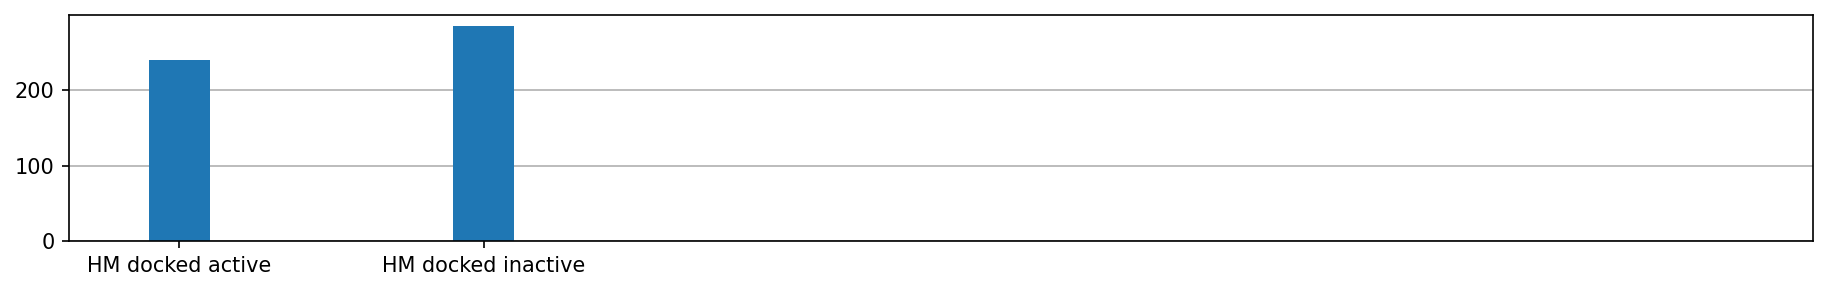

In [214]:
# plot displaying number of each entry type
structure_df['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [215]:
structure_df['Function'].value_counts()

Inactive    285
Active      240
Name: Function, dtype: int64

In [216]:
structure_df['entry_type'].value_counts().sort_index()

HM docked active      240
HM docked inactive    285
Name: entry_type, dtype: int64

In [217]:
structure_df['entry_type'].value_counts().sum() # number of entries in the dataset

525

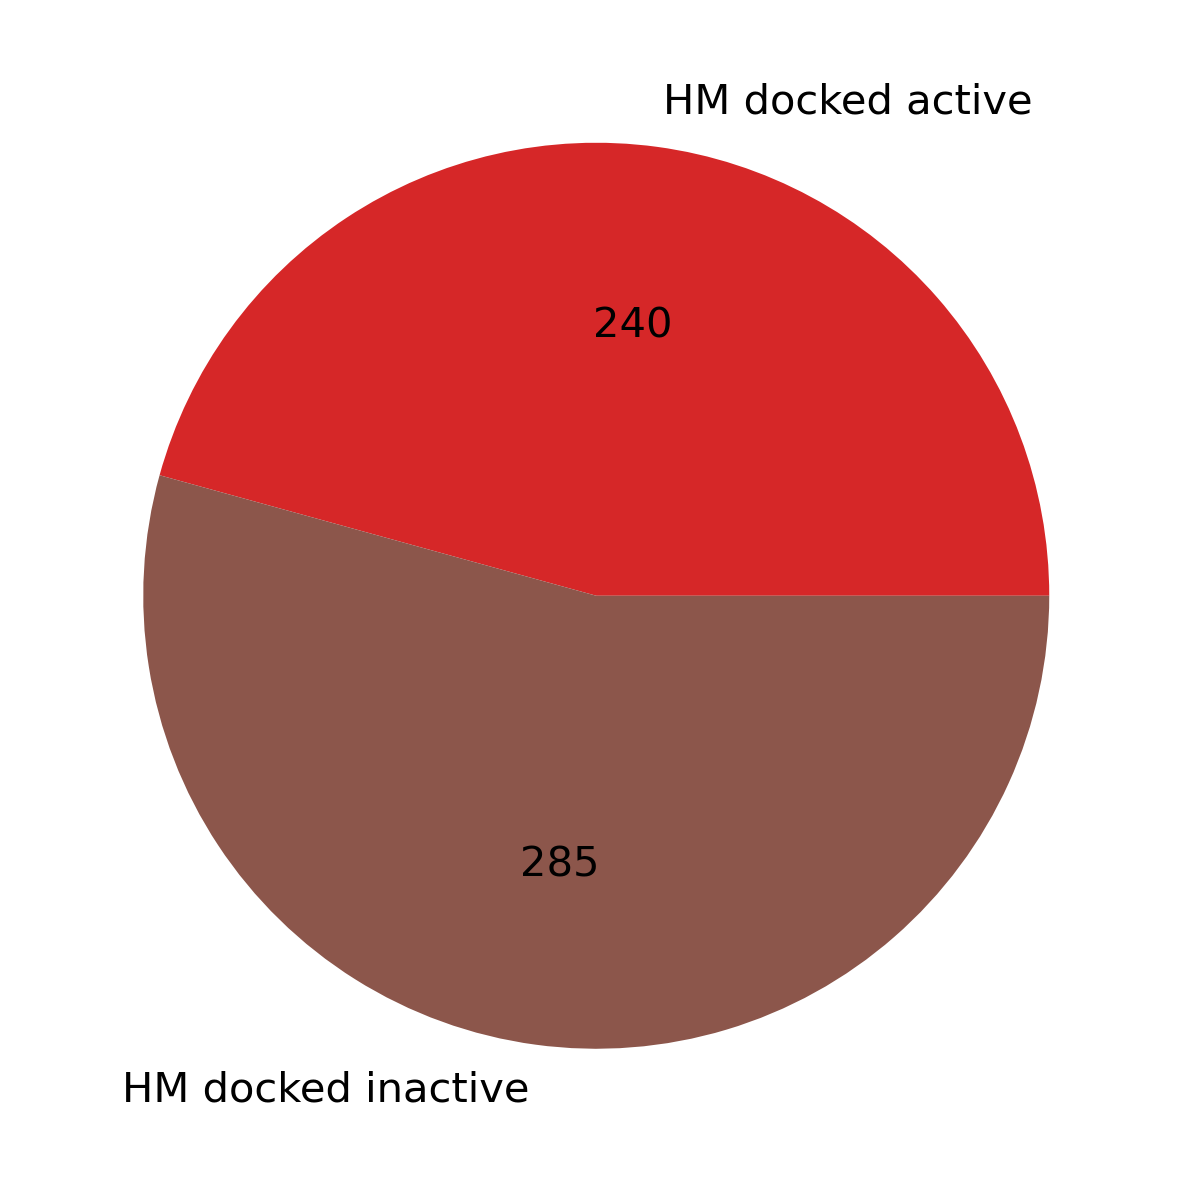

In [218]:
# pie chart

# color key
colors = {'experimentally determined active': 'tab:blue',
          'self-docked active': 'tab:orange',
          'cross-docked active': 'tab:purple',
          'docked inactive': 'tab:green',
          'HM docked active':'tab:red',
          'HM docked inactive':'tab:brown'
          
         }

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['figure.dpi'] = 300

values=structure_df['entry_type'].value_counts(dropna=True).sort_index()
vc = structure_df['entry_type'].value_counts(dropna=True).sort_index()
labels = vc.index

plt.pie(list(structure_df['entry_type'].value_counts().sort_index()),
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels]
       )
plt.show() 

In [219]:
# drop entry_type field but save it for later
entry_types = structure_df['entry_type']
structure_df.drop(['entry_type'], axis = 1, inplace = True)

In [220]:
# simplification: replace partial agonist with agonist
structure_df = structure_df.replace('Agonist (partial)', 'Agonist')

In [221]:
actual_fxns = structure_df['Function']

In [222]:
actual_fxns.unique()

array(['Active', 'Inactive'], dtype=object)

## Label Encoding

In [223]:
# convert inttype columns to string and get unique interaction types
interaction_types = []
inttype_cols = [col for col in structure_df.columns if 'inttype' in col]

for col in inttype_cols:
    structure_df[col] = structure_df[col].astype(str)
    uniq_col_ints = list(structure_df[col].unique())
    for interaction in uniq_col_ints:
        if interaction not in interaction_types:
            interaction_types.append(interaction)

In [224]:
interaction_types

['nan', 'None', 'Distance', 'Hbond', 'Arene', 'Ionic']

In [225]:
# custom encoding for inttypes
custom_mapping = {'nan' : 0, 'None' : 1, 'Hbond' : 2, 'Distance' : 3, 'Arene' : 4, 'Ionic' : 5, 'Covalent' : 6}

for col in inttype_cols:
    structure_df[col] = structure_df[col].map(custom_mapping)
    
# LabelEncoder for Function labels
le = LabelEncoder()

# get Function columns
cols = [col for col in structure_df.columns if 'Function' in col]

# loop though all columns and convert strings to categorical integer variable
for col in cols:
    structure_df[col] = le.fit_transform(structure_df[col])

In [226]:
structure_df

,PDBID,Function,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_intenergysum,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2
0,a2a_bc_activehm,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
1,a2a_bc_activehm,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
2,a2a_bc_activehm,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
3,a2a_bc_activehm,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
4,a2a_bc_activehm,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,d3_nc,1,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
521,d3_nc,1,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
522,d3_nc,1,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
523,d3_nc,1,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN


In [227]:
le.classes_

array(['Active', 'Inactive'], dtype=object)

In [228]:
# assign target classes to y
y = structure_df['Function']

# assign data to X
X = structure_df.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X['actual_fxn'] = actual_fxns

In [229]:
X

,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,...,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,actual_fxn
0,a2a_bc_activehm,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Active
1,a2a_bc_activehm,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Active
2,a2a_bc_activehm,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Active
3,a2a_bc_activehm,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Active
4,a2a_bc_activehm,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive
521,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive
522,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive
523,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive


In [230]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [231]:
# function to drop columns from train_df and test_df that are all NaN in test_df
def drop_nan_cols_match(train_df, test_df):
    empty_cols = []
    train_cols = list(train_df.columns)
    test_cols = list(test_df.columns)
    
    for test_col in test_cols:
        if sum(test_df[test_col].isnull()) == test_df.shape[0]:
            empty_cols.append(test_col)

    train_df.drop(empty_cols, axis = 1, inplace = True)
    test_df.drop(empty_cols, axis = 1, inplace = True)

In [232]:
drop_nan_cols_match(X_train, X_test)

In [233]:
len(X_train.columns)

1422

In [234]:
len(X_test.columns)

1422

## Scaling/Imputing

In [235]:
def scale_impute(dataframe):
    # get colnames
    colnames = list(dataframe.drop(['actual_fxn', 'PDBID'], axis = 1).columns)
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 

    # #rename columns
    df_imputed.columns = colnames
    
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [236]:
(X_train_imputed, X_train_fxns) = scale_impute(X_train)
(X_test_imputed, X_test_fxns) = scale_impute(X_test)

,PDBID,1.21_inttype1,1.21_inttype2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,1.22_intenergy2,1.23_intenergysum,1.23_inttype1,...,7.64_inttype1,7.64_inttype2,7.65_inttype1,7.65_inttype2,7.66_inttype1,7.66_inttype2,7.67_inttype1,7.67_inttype2,7.68_inttype1,7.68_inttype2
0,a2a_bc_inactivehm,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a2a_bc_activehm,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,beta1_nc,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,beta2_nc,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,beta1_bc_activehm,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,d3_bc_activehm,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,d3_bc_inactivehm,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,beta2_bc_activehm,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,d3_nc,0.0,0.0,0.0,-0.28748,0.0,-0.28748,0.0,0.0,-0.28748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,PDBID,1.21_inttype1,1.21_inttype2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,1.22_intenergy2,1.23_intenergysum,1.23_inttype1,...,7.64_inttype1,7.64_inttype2,7.65_inttype1,7.65_inttype2,7.66_inttype1,7.66_inttype2,7.67_inttype1,7.67_inttype2,7.68_inttype1,7.68_inttype2
0,beta1_nc,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,beta2_bc_inactivehm,0.0,0.0,0.0,3.025532,0.0,3.025532,0.0,0.0,3.025532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cxcr4_nc,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,beta1_bc_inactivehm,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cxcr4_bc_activehm,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,beta1_nc,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,cxcr4_bc_inactivehm,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,a2a_nc,0.0,0.0,0.0,-0.330520,0.0,-0.330520,0.0,0.0,-0.330520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,beta2_bc_inactivehm,0.0,0.0,0.0,3.025532,0.0,3.025532,0.0,0.0,3.025532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

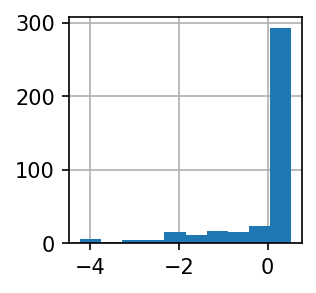

In [237]:
plt.rcParams["figure.figsize"] = (2,2)
plt.rcParams['figure.dpi'] = 150
X_train_imputed['3.32_intenergysum'].hist()

In [238]:
X_train_fxns = X_train_fxns.reset_index()
X_train_fxns.drop(['index'], axis = 1, inplace = True)

X_test_fxns = X_test_fxns.reset_index()
X_test_fxns.drop(['index'], axis = 1, inplace = True)

In [239]:
def train_test_predict(train_df, train_y, test_df, test_y, encoder):
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=250,
                               random_state=1,
                               class_weight = 'balanced_subsample',
                               bootstrap = True,
                               max_depth = 10,
                               max_features = 'auto',
                               min_samples_leaf = 2,
                               min_samples_split = 2,
                              )

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_df.iloc[:, 1:], train_y)
    
    # print classes able to be predicted by the model (check 8/1/22)
    # print(clf.classes_)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, KFold
    import numpy as np

    # cross-validation
    scores = cross_val_score(clf, train_df.iloc[:, 1:], train_y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(clf, train_df.iloc[:, 1:], train_y, cv=kfold)
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
    # test set predictions
    y_pred = clf.predict(test_df.iloc[:, 1:])
    
    # print unique classes predicted on the testing data (check 8/1/22)
    # print(np.unique(y_pred))

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_pred)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    
     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')
    return y_pred_actual, y_test_actual, clf

In [240]:
y_pred_actual, y_test_actual, rf_model = train_test_predict(X_train_imputed, y_train, X_test_imputed, y_test, le)

Mean cross-validation score: 0.62
K-fold CV average score: 0.62

 Predicted  Active  Inactive
Actual                     
Active         31        23
Inactive       27        51 

Accuracy: 0.62
Precision: 0.63
Recall: 0.62 



In [241]:
pd.options.mode.chained_assignment = None

# X_test['function'] = y_test_actual
X_test['pred_function'] = y_pred_actual
X_test['entry_type'] = entry_types

X_train['entry_type'] = entry_types

In [242]:
X_train['entry_type'].value_counts().sort_index()

HM docked active      186
HM docked inactive    207
Name: entry_type, dtype: int64

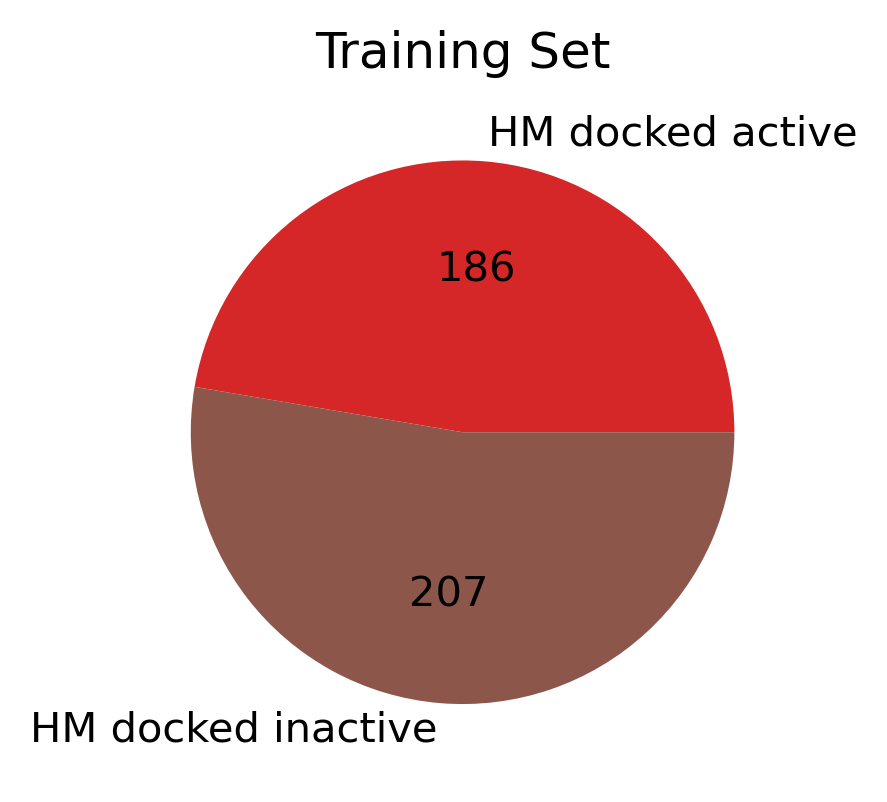

In [243]:
# plot to show training set size
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 300

values=X_train['entry_type'].value_counts(dropna=True).sort_index()
vc = X_train['entry_type'].value_counts().sort_index()
labels = vc.index

plt.pie(vc,
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels]
       )
plt.title('Training Set')
plt.show() 

In [244]:
X_test['entry_type'].value_counts().sort_index()

HM docked active      54
HM docked inactive    78
Name: entry_type, dtype: int64

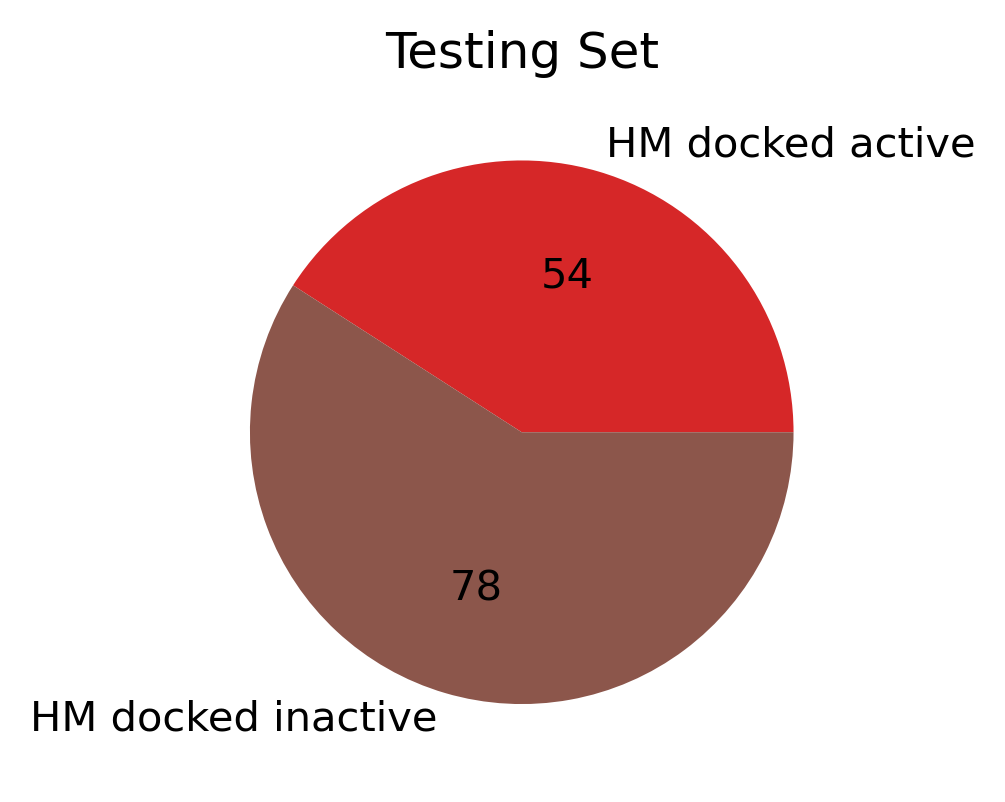

In [245]:
# plot to show testing set size
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 300

values=X_test['entry_type'].value_counts(dropna=True).sort_index()
vc = X_test['entry_type'].value_counts().sort_index()
labels = vc.index

plt.pie(vc,
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels],
       )
plt.title('Testing Set')
plt.show() 

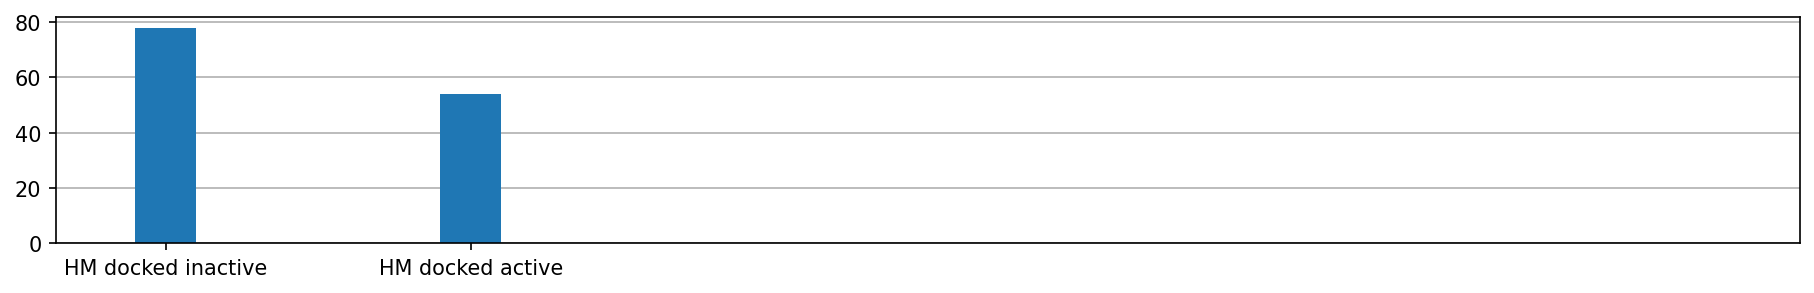

In [246]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["figure.figsize"] = (15,2)
plt.rcParams['figure.dpi'] = 150
X_test['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [247]:
# get incorrect predictions in test set

entries = []
for i in range(len(X_test)):
    if X_test['actual_fxn'].iloc[i] != X_test['pred_function'].iloc[i]:
        entries.append(i)

wrong_preds_df = X_test.iloc[entries,:]

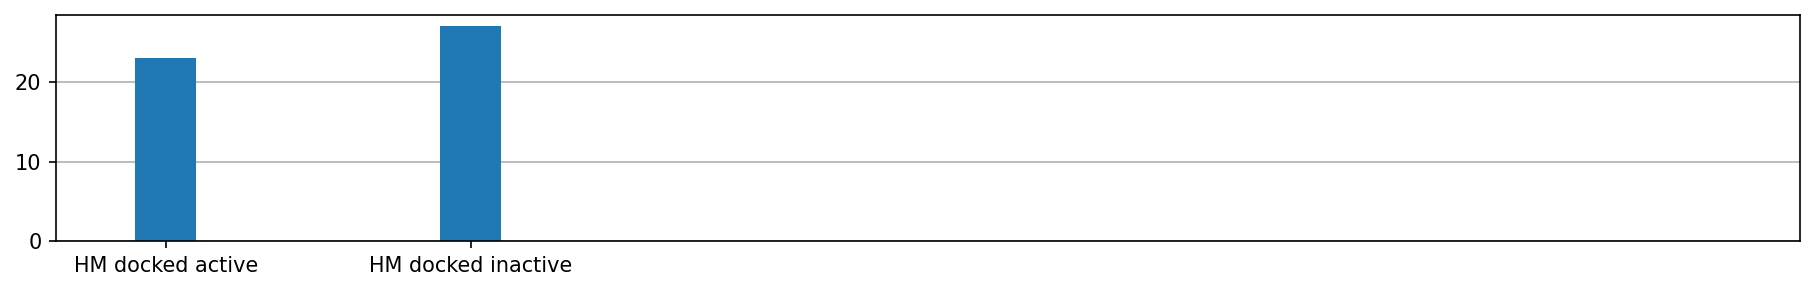

In [248]:
# histogram denoting which entry type is most frequently predicted incorrectly
wrong_preds_df['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [249]:
# print('Entry Type\tIncorrect\tNum. Entries\tPercent Incorrect\tPercent Correct')

entry_types_uniq = []
incorrects = []
num_entries = []
percent_incorrect = []
percent_correct = []
for x in ['HM docked active', 'HM docked inactive']:
    num_test_entries = len(X_test.loc[X_test['entry_type'] == x])
    incorrect_test_entries = len(wrong_preds_df.loc[X_test['entry_type'] == x])
    percent = (incorrect_test_entries / num_test_entries) * 100
    
    # append each value to lists to be used for df construction
    entry_types_uniq.append(x)
    incorrects.append(incorrect_test_entries)
    num_entries.append(num_test_entries)
    percent_incorrect.append("{:.2f}".format(percent))
    percent_correct.append("{:.2f}".format(100 - percent))
#     print(x, '\t', incorrect_test_entries, '\t\t', num_test_entries, '\t\t', percent, '\t', 100 - percent)

# dataframe construction/display
results_df = pd.DataFrame({
    'Entry Type': entry_types_uniq,
    'Incorrect': incorrects,
    'Num. Entries' : num_entries,
    'Percent Incorrect' : percent_incorrect,
    'Percent Correct' : percent_correct
})

display(results_df)

,Entry Type,Incorrect,Num. Entries,Percent Incorrect,Percent Correct
0,HM docked active,23,54,42.59,57.41
1,HM docked inactive,27,78,34.62,65.38


In [197]:
X_test_HM_docked_active = X_test[X_test['entry_type'] == 'HM docked active']
X_test_HM_docked_inactive = X_test[X_test['entry_type'] == 'HM docked inactive']

In [198]:
X_test

,PDBID,1.21_inttype1,1.21_inttype2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,1.22_intenergy2,1.23_intenergysum,1.23_inttype1,...,7.65_inttype2,7.66_inttype1,7.66_inttype2,7.67_inttype1,7.67_inttype2,7.68_inttype1,7.68_inttype2,actual_fxn,pred_function,entry_type
473,beta1_nc,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Inactive,Active,HM docked inactive
379,beta2_bc_inactivehm,0,0,0.0,1,0.0,1,0.0,0.0,1,...,0,0,0,0,0,0,0,Inactive,Active,HM docked inactive
218,cxcr4_nc,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Active,Active,HM docked active
326,beta1_bc_inactivehm,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Inactive,Active,HM docked inactive
110,cxcr4_bc_activehm,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Active,Active,HM docked active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,beta1_nc,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Active,Inactive,HM docked active
409,cxcr4_bc_inactivehm,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Inactive,Inactive,HM docked inactive
450,a2a_nc,0,0,NaN,0,NaN,0,NaN,NaN,0,...,0,0,0,0,0,0,0,Inactive,Inactive,HM docked inactive
366,beta2_bc_inactivehm,0,0,0.0,1,0.0,1,0.0,0.0,1,...,0,0,0,0,0,0,0,Inactive,Active,HM docked inactive


In [199]:
pd.crosstab(X_test_HM_docked_active['actual_fxn'], X_test_HM_docked_active['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Active,Inactive
Actual,,
Active,34,20


In [200]:
pd.crosstab(X_test_HM_docked_inactive['actual_fxn'], X_test_HM_docked_inactive['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Active,Inactive
Actual,,
Inactive,38,40


## GridSearch for best RF parameters

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [202]:
params_to_test = {
    'n_estimators':[10, 100, 250, 500, 750, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

In [203]:
rf_model = RandomForestClassifier(random_state=1, class_weight = 'balanced_subsample')

grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='accuracy')

grid_search.fit(X_train_imputed.iloc[:, 1:], y_train)

best_params = grid_search.best_params_ 

print(best_params)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


In [61]:
grid_search.best_score_

0.7918473593817089